# 1. Reference Data

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
freq_ref = pd.read_csv("reference data_frequency sweep.dat", sep="\t")
amp_ref = pd.read_csv("referenc data_amplitude sweep.dat", sep="\t")

freq_data_exp = pd.read_csv("collagen_sample(frequency sweep).txt", delimiter="\t", header = [0, 1], skiprows=119, engine = "c")
amp_data_exp = pd.read_csv("collagen_sample(amplitude sweep).txt", delimiter="\t", header = [0, 1], skiprows=119, engine = "c")
time_data_exp = pd.read_csv("collagen_sample(time sweep).txt", delimiter="\t", header = [0, 1], skiprows=119, engine = "c")

In [65]:
freq_ref.columns = [0,1,2,3,4,5]
amp_ref.columns = [0,1,2,3,4,5]
amp_data_exp

,Storage modulus,Loss modulus,Tan(delta),Angular frequency,Oscillation torque,Step time,Temperature,Raw phase,Oscillation displacement,Oscillation strain
,Pa,Pa,Unnamed: 2_level_1,rad/s,µN.m,s,°C,°,rad,%
0,39.244200,23.06000,0.587603,6.28319,0.122505,6.09857,37.00,162.839,0.000200,0.099788
1,39.048000,21.61690,0.553598,6.28319,0.154217,12.74800,37.00,163.896,0.000252,0.125982
2,38.691300,21.00330,0.542844,6.28319,0.194560,19.28780,37.00,164.400,0.000317,0.158585
3,38.557200,20.97050,0.543879,6.28319,0.245141,25.84910,37.00,164.450,0.000399,0.199507
4,38.180200,19.91030,0.521483,6.28319,0.309286,32.46770,37.00,165.271,0.000503,0.251431
5,37.156500,19.27730,0.518813,6.28319,0.393587,39.00280,37.00,165.903,0.000633,0.316591
6,36.585200,18.31660,0.500657,6.28319,0.497473,45.58970,37.00,166.675,0.000797,0.398503
7,35.113100,17.94900,0.511177,6.28319,0.637252,52.18190,37.00,167.169,0.001004,0.501956
8,33.975500,16.99550,0.500226,6.28319,0.811198,58.80110,37.00,167.998,0.001264,0.631881


In [66]:
freq_ref.drop(2,axis=1,inplace=True)
freq_ref.drop(5,axis=1,inplace=True)
amp_ref.drop(2,axis=1,inplace=True)
amp_ref.drop(5,axis=1,inplace=True)

In [67]:
freq_L, freq_S = freq_ref[0], freq_ref[3]
Lf_ref, Sf_ref = freq_ref[1], freq_ref[4]

str_L, str_S = amp_ref[0], amp_ref[3]
La_ref, Sa_ref = amp_ref[1], amp_ref[4]

freq_exp = freq_data_exp["Frequency"]
strain_exp = amp_data_exp["Oscillation strain"]
Lf_exp , Sf_exp = freq_data_exp["Loss modulus"], freq_data_exp["Storage modulus"]
La_exp, Sa_exp = amp_data_exp["Loss modulus"], amp_data_exp["Storage modulus"]

time_exp =time_data_exp["Step time"]
Lt_exp = time_data_exp["Loss modulus"]
St_exp = time_data_exp["Storage modulus"]


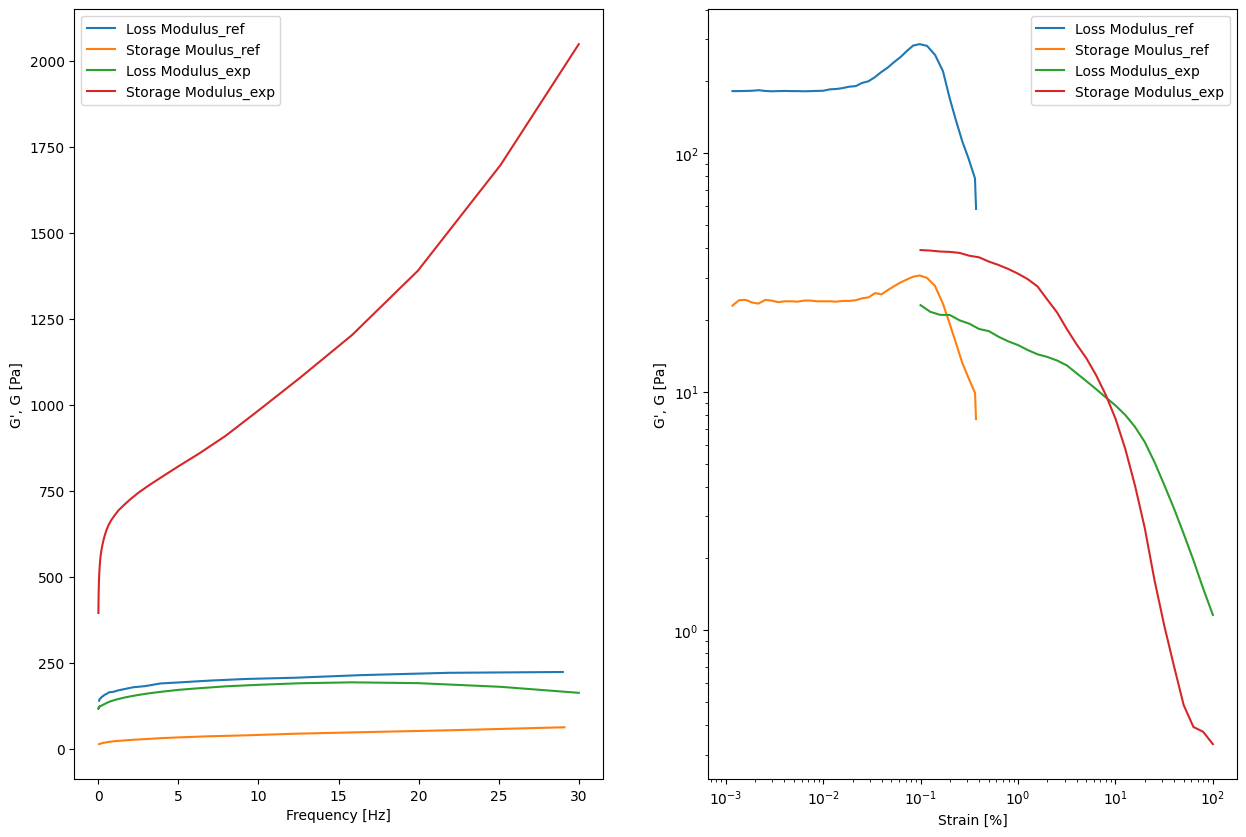

In [68]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.plot(freq_L, Lf_ref, label="Loss Modulus_ref")
ax1.plot(freq_S, Sf_ref, label="Storage Moulus_ref")
ax1.plot(freq_exp, Lf_exp, label="Loss Modulus_exp")
ax1.plot(freq_exp, Sf_exp, label="Storage Modulus_exp")
ax1.set_xlabel("Frequency [Hz]")
ax1.set_ylabel("G', G [Pa]")
ax1.legend()

ax2.plot(str_L, La_ref, label="Loss Modulus_ref")
ax2.plot(str_S, Sa_ref, label="Storage Moulus_ref")
ax2.plot(strain_exp, La_exp, label="Loss Modulus_exp")
ax2.plot(strain_exp, Sa_exp, label="Storage Modulus_exp")
ax2.set_xlabel("Strain [%]")
ax2.set_ylabel("G', G [Pa]")
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.legend()


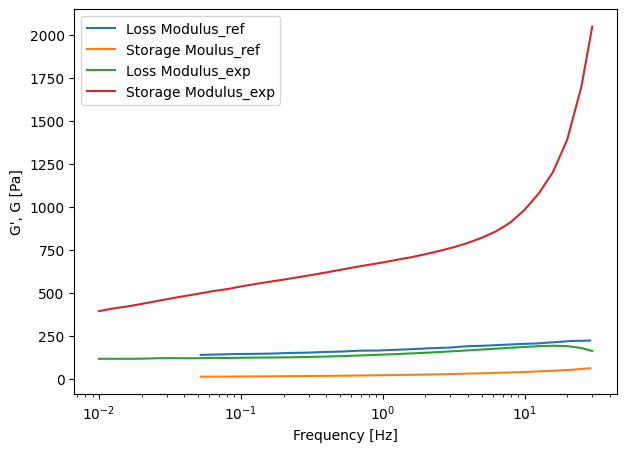

In [69]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))

ax.plot(freq_L, Lf_ref, label="Loss Modulus_ref")
ax.plot(freq_S, Sf_ref, label="Storage Moulus_ref")
ax.plot(freq_exp, Lf_exp, label="Loss Modulus_exp")
ax.plot(freq_exp, Sf_exp, label="Storage Modulus_exp")
ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("G', G [Pa]")
ax.set_xscale("log")
ax.legend()

# Time Sweep

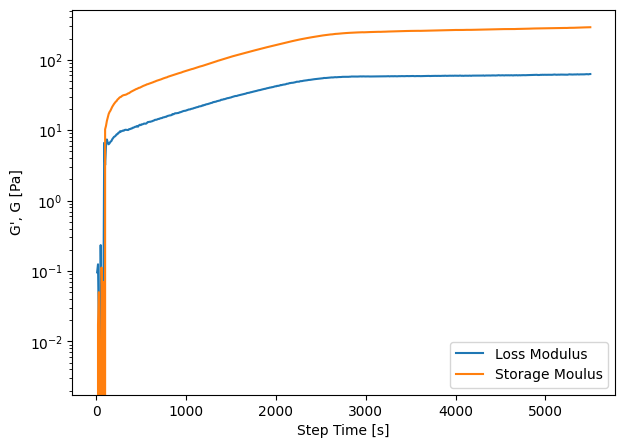

In [72]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))

ax.plot(time_exp, Lt_exp, label="Loss Modulus")
ax.plot(time_exp, St_exp, label="Storage Moulus")
ax.set_xlabel("Step Time [s]")
ax.set_ylabel("G', G [Pa]")
ax.set_yscale("log")
ax.legend()